In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# SMALL WORLD

In [6]:
Nlist=[100,250,500,750,1000,1250,1500,1750,2000]
NREPL=2
m=3

In [7]:
#graph generation
graphs={}
for nn in Nlist:
    print nn
    graphs[nn]=[]
    for r in range(NREPL):
        graphs[nn].append(nx.barabasi_albert_graph(nn,3))

100
250
500
750
1000
1250
1500
1750
2000


In [8]:
avShPath=[]
for nn in Nlist:
    print nn
    l=[]
    for G in graphs[nn]:
        l.append(nx.average_shortest_path_length(G))
    avShPath.append(np.mean(l))

100
250
500
750
1000
1250
1500
1750
2000


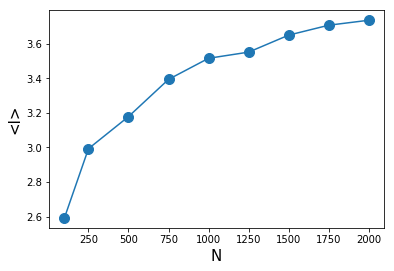

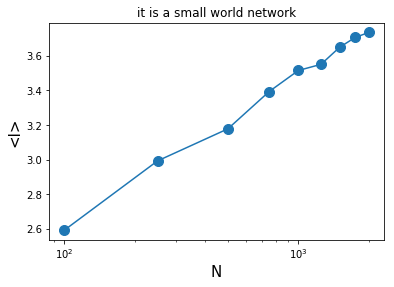

In [9]:
plt.plot(Nlist,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.show()

plt.semilogx(Nlist,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.title('it is a small world network')
plt.show()

# clustering

In [11]:
clustering=[]
for nn in Nlist:
    print nn
    c=[]
    for G in graphs[nn]:
        clustList=[nx.clustering(G,i) for i in G.nodes()]
        c.append(np.mean(clustList))
    clustering.append(np.mean(c))

100
250
500
750
1000
1250
1500
1750
2000


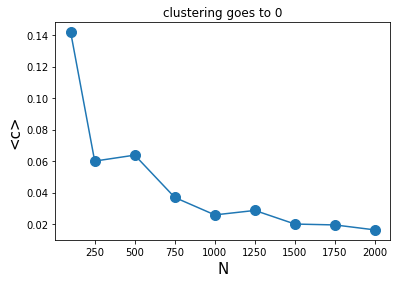

In [12]:
plt.plot(Nlist,clustering,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<c>',size=15)
plt.title('clustering goes to 0')
plt.show()

# degree Mixing

In [13]:
N=5000
m=3
Nrepl=10

In [14]:
knn=[]
kk=[]
for r in range(Nrepl):
    G=nx.barabasi_albert_graph(N,3)
    knn=knn+[ np.mean([G.degree(v) for v in G.neighbors(u)])  for u in G.nodes()]
    kk=kk+[G.degree(u) for u in G.nodes()]

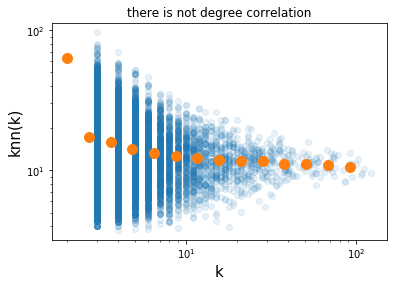

In [15]:
plt.loglog(kk,knn,'o',alpha=0.1)
logBins=np.logspace(np.log2(np.min(kk)),np.log2(np.max(kk)),base=2,num=15)
#if I use np.linspace I will have linear bins
ybin,xbin,binnumber=scipy.stats.binned_statistic(kk,knn,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'o',markersize=10)

plt.xlabel('k',size=15)
plt.ylabel('knn(k)',size=15)
plt.title('there is not degree correlation')
plt.show()